In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
solar_data = pd.read_csv('/Users/dtjgp/Learning/GreenAI/Opreation/solve/pvwatts_hourly.csv')

In [28]:
G_max_solar = solar_data['AC System Output (W)'][1:8761].tolist()
G_max_solar = G_max_solar[0:144]
G_max_solar

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 193.056,
 456.187,
 698.037,
 798.739,
 744.47,
 550.861,
 276.852,
 47.432,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 79.149,
 151.658,
 195.548,
 214.597,
 197.529,
 151.481,
 83.781,
 11.64,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 197.027,
 465.658,
 724.393,
 840.61,
 785.156,
 577.757,
 287.2,
 54.188,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 213.6,
 498.359,
 782.73,
 913.997,
 854.124,
 631.132,
 321.292,
 62.236,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 211.266,
 461.919,
 669.045,
 763.252,
 712.175,
 538.016,
 293.096,
 55.485,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 215.201,
 503.584,
 790.216,
 923.281,
 866.243,
 640.185,
 323.377,
 65.209,
 0.0,
 0

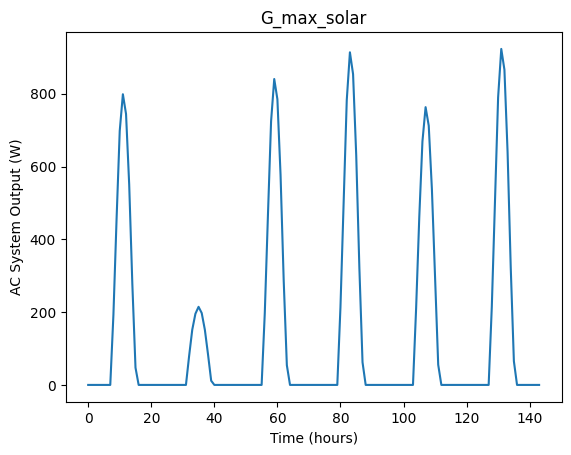

In [29]:
# plot the G_max_solar data
plt.plot(G_max_solar)
plt.xlabel('Time (hours)')
plt.ylabel('AC System Output (W)')
plt.title('G_max_solar')
plt.show()

In [30]:
# load Duration26_start26.csv
Duration22 = pd.read_csv('sum_duration22.csv')
Duration22

,time,minimum_cost,day,hour_in_day,day_hour
0,0,0.56177,1,0,1d0h
1,1,0.58677,1,1,1d1h
2,2,0.58677,1,2,1d2h
3,3,0.58677,1,3,1d3h
4,4,0.58677,1,4,1d4h
...,...,...,...,...,...
139,139,0.52643,6,19,6d19h
140,140,0.52643,6,20,6d20h
141,141,0.52643,6,21,6d21h
142,142,0.52643,6,22,6d22h


In [31]:
# 将G_max_solar[0:144] 与 Duration23 合并

Duration22 = pd.DataFrame(Duration22)
Duration22['PV_solar'] = G_max_solar
Duration22

,time,minimum_cost,day,hour_in_day,day_hour,PV_solar
0,0,0.56177,1,0,1d0h,0.0
1,1,0.58677,1,1,1d1h,0.0
2,2,0.58677,1,2,1d2h,0.0
3,3,0.58677,1,3,1d3h,0.0
4,4,0.58677,1,4,1d4h,0.0
...,...,...,...,...,...,...
139,139,0.52643,6,19,6d19h,0.0
140,140,0.52643,6,20,6d20h,0.0
141,141,0.52643,6,21,6d21h,0.0
142,142,0.52643,6,22,6d22h,0.0


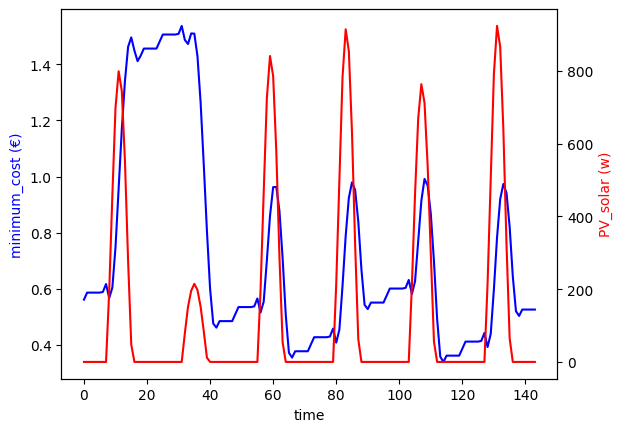

In [32]:
# 画图：纵轴显示Duration23中minimum_cost 与 PV_solar，横轴显示time
fig, ax1 = plt.subplots()

ax1.plot(Duration22['time'], Duration22['minimum_cost'], 'b-')

ax2 = ax1.twinx()
ax2.plot(Duration22['time'], Duration22['PV_solar'], 'r-')

ax1.set_xlabel('time')
ax1.set_ylabel('minimum_cost (€)', color='b')
ax2.set_ylabel('PV_solar (w)', color='r')
# ax1.set_title('minimum_cost under different start time')
# ax2.set_title('PV_solar at different time')
plt.show()




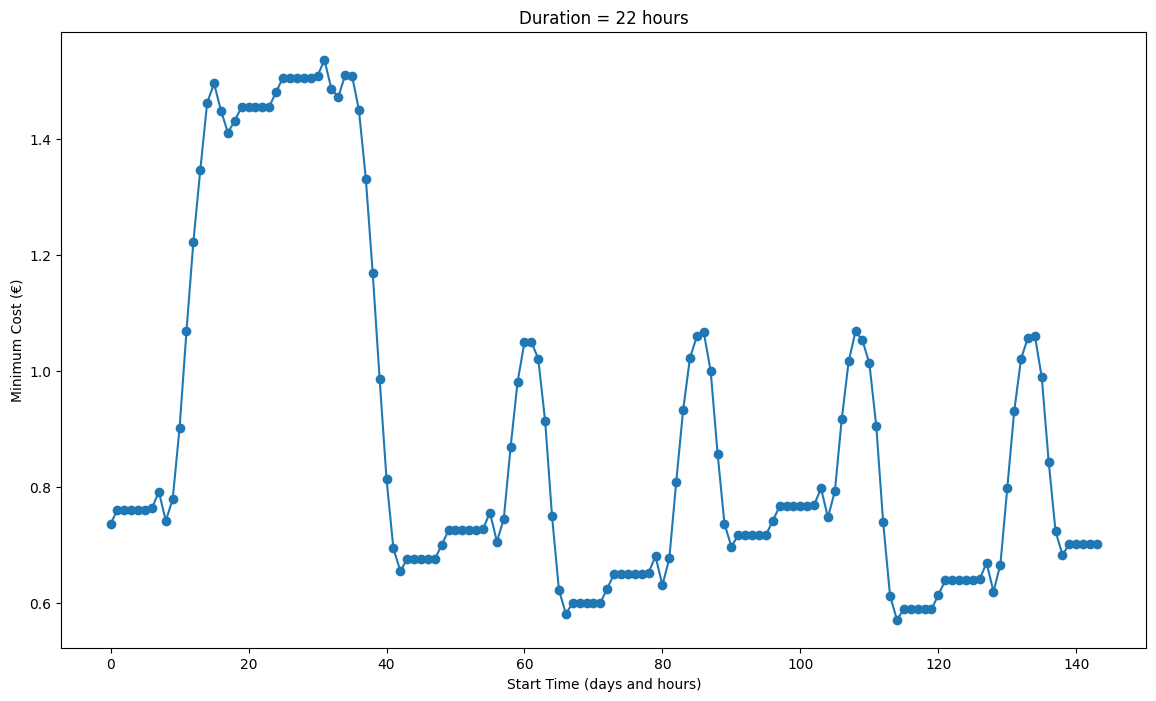

In [33]:
for i in range(22,23):
    # Initialize lists to store the extracted data
    times = []
    minimum_costs = []
    # Loop through each file index
    for j in range(1, 145):  # This will loop from 1 to 26
        # Construct the file name based on the current index
        file_name = f'Duration{i}_start{j-1}.csv'
        # Read the CSV file
        df = pd.read_csv(file_name)
        
        # Extract the 'time' and 'minimum_cost' from the first row of the DataFrame
        time = df['time'][0]
        minimum_cost = df['minimum_cost'][0]/1000
    
        
        # Append the extracted data to the lists
        times.append(time)
        minimum_costs.append(minimum_cost)

    # Optionally, you can create a DataFrame to store all the results together
    results_df = pd.DataFrame({
        'time': times,
        'minimum_cost': minimum_costs
    })
    # Convert time to days
    results_df['day'] = results_df['time'] // 24+1
    results_df['hour_in_day'] = results_df['time'] % 24

    # Combine day and hour for the x-axis labels
    results_df['day_hour'] = results_df['day'].astype(str) + 'd' + results_df['hour_in_day'].astype(str) + 'h'

    # Plot the results_df
    plt.figure(figsize=(14, 8))
    plt.plot(results_df['time'], results_df['minimum_cost'], marker='o')
    plt.xlabel('Start Time (days and hours)')
    plt.ylabel('Minimum Cost (€)')
    plt.title(f'Duration = {i} hours')

    # # Set x-axis to show days and selected hours
    # xticks = range(0, 144, 6)  # Show every 6 hours
    # xlabels = [results_df['day_hour'][tick] for tick in xticks]
    # plt.xticks(ticks=xticks, labels=xlabels, rotation=90)
    # plt.grid(True)
    
    plt.show()
    # Save this data to a new CSV file
    results_df.to_csv(f'sum_duration{i}.csv', index=False)


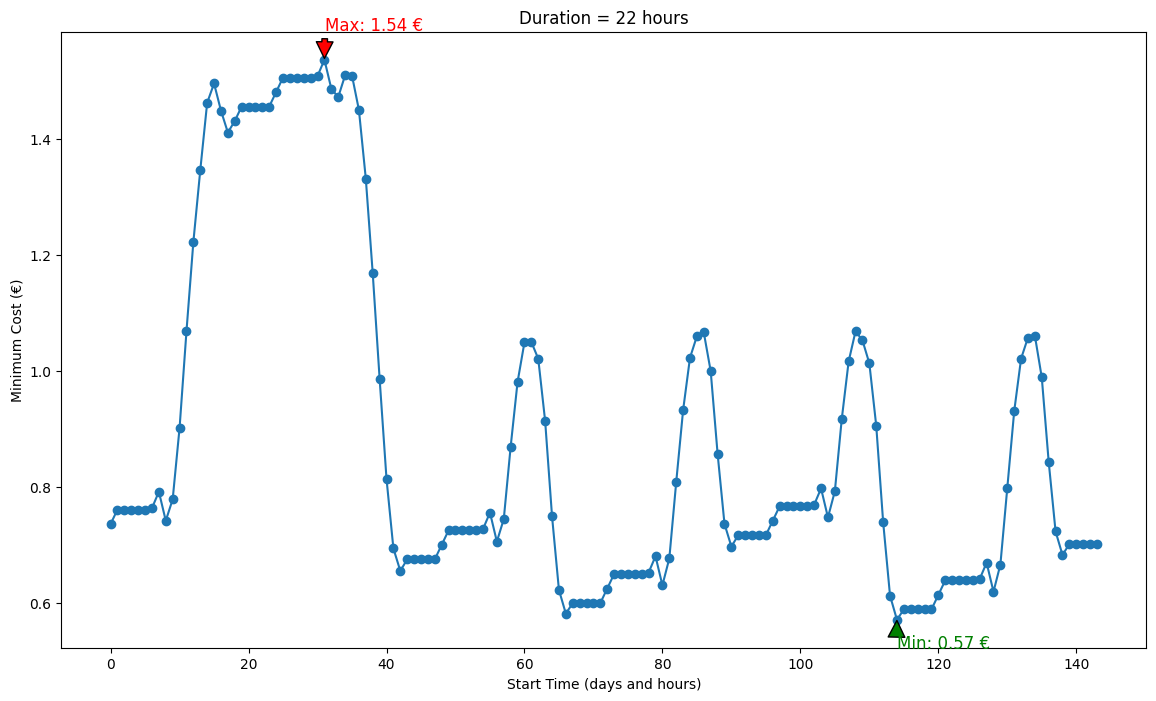

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

for i in range(22, 23):
    # Initialize lists to store the extracted data
    times = []
    minimum_costs = []

    # Loop through each file index
    for j in range(1, 145):  # This will loop from 1 to 72
        # Construct the file name based on the current index
        file_name = f'Duration{i}_start{j-1}.csv'
        
        try:
            # Read the CSV file
            df = pd.read_csv(file_name)
            
            # Extract the 'time' and 'minimum_cost' from the first row of the DataFrame
            time = df['time'][0]
            minimum_cost = df['minimum_cost'][0] / 1000
            
            # Append the extracted data to the lists
            times.append(time)
            minimum_costs.append(minimum_cost)
        except FileNotFoundError:
            print(f"File {file_name} not found.")
            continue

    # Create a DataFrame to store all the results together
    results_df = pd.DataFrame({
        'time': times,
        'minimum_cost': minimum_costs
    })

    # Convert time to days and hours
    results_df['day'] = results_df['time'] // 24 + 1  # Add 1 to start from the first day
    results_df['hour_in_day'] = results_df['time'] % 24

    # Combine day and hour for the x-axis labels
    results_df['day_hour'] = results_df['day'].astype(str) + 'd' + results_df['hour_in_day'].astype(str) + 'h'

    # Find the indices of the minimum and maximum costs
    min_index = results_df['minimum_cost'].idxmin()
    max_index = results_df['minimum_cost'].idxmax()

    # Plot the results_df
    plt.figure(figsize=(14, 8))
    plt.plot(results_df['time'], results_df['minimum_cost'], marker='o')
    plt.xlabel('Start Time (days and hours)')
    plt.ylabel('Minimum Cost (€)')
    plt.title(f'Duration = {i} hours')

    # # Set x-axis to show days and selected hours
    # xticks = range(0, 145, 6)  # Show every 6 hours
    # xlabels = [results_df['day_hour'][tick] for tick in xticks]
    # plt.xticks(ticks=xticks, labels=xlabels, rotation=90)
    # plt.grid(True)
    
    # Annotate the minimum and maximum points
    plt.annotate(f'Min: {results_df["minimum_cost"][min_index]:.2f} €', 
                 xy=(results_df['time'][min_index], results_df['minimum_cost'][min_index]), 
                 xytext=(results_df['time'][min_index]-0.05, results_df['minimum_cost'][min_index]-0.05),
                 arrowprops=dict(facecolor='green', shrink=0.05),
                 fontsize=12, color='green')
    
    plt.annotate(f'Max: {results_df["minimum_cost"][max_index]:.2f} €', 
                 xy=(results_df['time'][max_index], results_df['minimum_cost'][max_index]), 
                 xytext=(results_df['time'][max_index]+0.05, results_df['minimum_cost'][max_index]+0.05),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 fontsize=12, color='red')

    plt.show()

    # Save this data to a new CSV file
    # results_df.to_csv(f'sum_duration{i}.csv', index=False)

In [39]:
import os
import numpy as np
os.getcwd()
grid_gen_data = np.zeros((144, 22))
ESD_data = np.zeros((144, 22))
solar_data = np.zeros((144, 22))
for i in range(144):
    # open the file of Duration22_start{i}.csv file
    file = pd.read_csv(f'Duration22_start{i}.csv')
    grid_gen_data[i] = file['G_grid'].values
    ESD_data[i] = file['ESD'].values
    solar_data[i] = file['G_solar'].values
# grid_gen_data
    

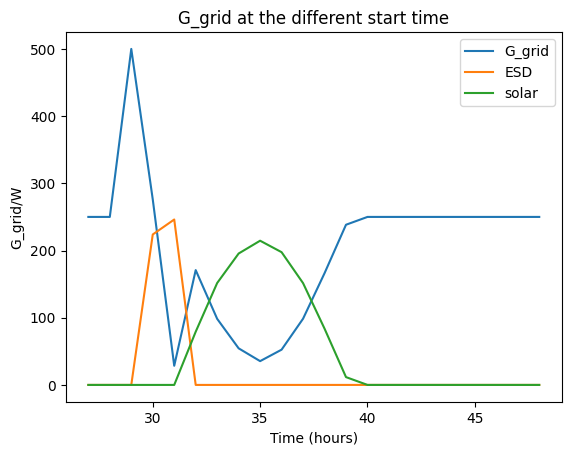

In [48]:
# plot the grid_gen_data, the x-axis is the time, the y-axis is the G_grid, there will be 144 lines
# for i in range(24):
# print(grid_gen_data[0,:])
i = 27
x = np.arange(i, i+22, 1)
plt.plot(x, grid_gen_data[i,:])
plt.plot(x, ESD_data[i,:])
plt.plot(x, solar_data[i,:])
plt.xlabel('Time (hours)')
plt.ylabel('G_grid/W')
plt.title('G_grid at the different start time')
plt.legend(['G_grid', 'ESD', 'solar'])
plt.show()
